# **Titanic - Machine Learning from Disaster Using Some Supervised Learning Methods**

## **Data Importation**

---



In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix ,f1_score, precision_score, recall_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.utils import to_categorical

In [26]:
train=pd.read_csv("/content/train.csv")
test=pd.read_csv("/content/test.csv")
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [4]:
train.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                     

In [5]:
test.head

<bound method NDFrame.head of      PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0 

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## **Data Preparation**

In [8]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [27]:
#Dropping the unecessary columns
train.drop(['PassengerId', 'Ticket','Cabin'], axis=1, inplace=True)
test.drop(['Ticket','Cabin'], axis=1, inplace=True)

In [28]:
#Fixing the missing values
train.dropna(subset=['Embarked'], inplace = True)
test.fillna(value = test['Fare'].median(), inplace = True)
train.fillna(value = train["Age"].median(),inplace = True)
test.fillna(value = test["Age"].median(), inplace = True)

In [14]:
train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [15]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [16]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,27.018089,0.447368,0.392344,35.576535
std,120.810458,0.841838,14.163993,0.896760,0.981429,55.850103
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,14.454200,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [18]:
train.info

<bound method DataFrame.info of      Survived  Pclass                                               Name  \
0           0       3                            Braund, Mr. Owen Harris   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2           1       3                             Heikkinen, Miss. Laina   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4           0       3                           Allen, Mr. William Henry   
..        ...     ...                                                ...   
886         0       2                              Montvila, Rev. Juozas   
887         1       1                       Graham, Miss. Margaret Edith   
888         0       3           Johnston, Miss. Catherine Helen "Carrie"   
889         1       1                              Behr, Mr. Karl Howell   
890         0       3                                Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch     Fare Embarked  
0  

In [19]:
test.info

<bound method DataFrame.info of      PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex      Age  SibSp  Parch      Fare Embarked  
0      male  34.5000   

**Feature "Sex"**

% of women who survived: 0.7403846153846154
% of men who survived: 0.18890814558058924


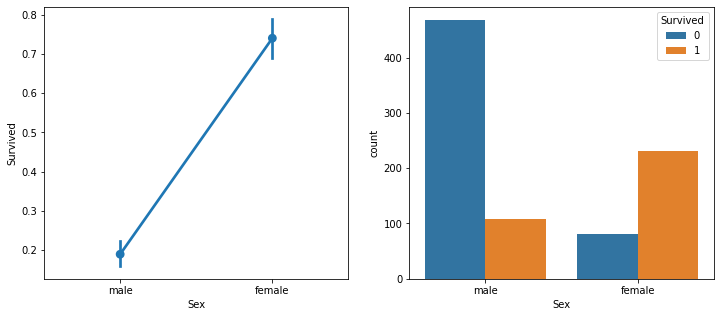

In [29]:
#Rate of women who survived
women = train.loc[train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)
print("% of women who survived:", rate_women)

#Rate of men who survived
men = train.loc[train.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)
print("% of men who survived:", rate_men)

#Data Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
sns.pointplot(data=train, x="Sex", y="Survived", ax=ax1)
sns.countplot(data=train, x="Sex", hue="Survived", ax=ax2)

#creating the sex column as integer
train["Sex"] = train["Sex"].map({"male" : 0, "female" : 1})
test["Sex"] = test["Sex"].map({"male" : 0, "female" : 1})

Women are most likely to survive. So the variable sex interferes with survival

**Feature "Name"**

% of mr who survived: 0.15667311411992263
% of mrs who survived: 0.7903225806451613
% of miss who survived: 0.6961325966850829
% of master who survived: 0.575


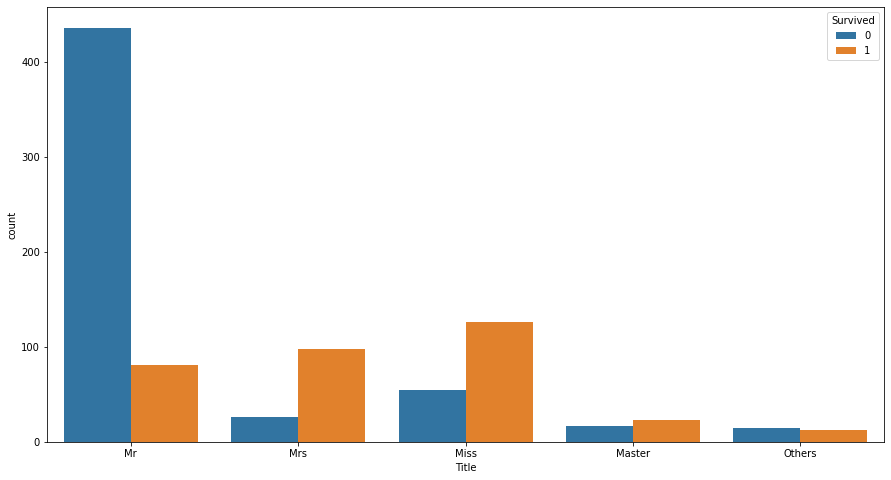

In [30]:
#Names doesn't matter much, but the title associated with it may help.
#Extract titles from names
train['Title'] = train["Name"].map(lambda name : name.split(".")[0].split(" ")[-1])
test['Title'] = test["Name"].map(lambda name : name.split(".")[0].split(" ")[-1])
train["Title"] = train["Title"].map({"Mr" : "Mr", "Mrs" : "Mrs", "Miss" : "Miss", "Master" : "Master"})
train["Title"].fillna("Others", inplace=True)
test["Title"] = test["Title"].map({"Mr" : "Mr", "Mrs" : "Mrs", "Miss" : "Miss", "Master" : "Master"})
test["Title"].fillna("Others", inplace=True)

#Rate of Mr who survived
mr = train.loc[train.Title == 'Mr']["Survived"]
rate_mr = sum(mr)/len(mr)
print("% of mr who survived:", rate_mr)


#Rate of Mrs who survived
mrs = train.loc[train.Title == 'Mrs']["Survived"]
rate_mrs = sum(mrs)/len(mrs)
print("% of mrs who survived:", rate_mrs)


#Rate of Miss who survived
miss = train.loc[train.Title == 'Miss']["Survived"]
rate_miss = sum(miss)/len(miss)
print("% of miss who survived:", rate_miss)


#Rate of Master who survived
master = train.loc[train.Title == 'Master']["Survived"]
rate_master = sum(master)/len(master)
print("% of master who survived:", rate_master)

#Data Visualization
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(15,8))
sns.countplot(data=train, x="Title", hue="Survived", ax=ax1)

#Creating the column title as integers 
train["Title"] = train["Title"].map({"Mr" : 0, "Mrs" : 1, "Miss" : 2, "Master" : 3, "Others" : 4})
test["Title"] = test["Title"].map({"Mr" : 0, "Mrs" : 1, "Miss" : 2, "Master" : 3, "Others" : 4})

#Drop the column Name as it's not needed anymore
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [ ]:
train.dtypes

Survived         int64
Pclass           int64
Sex              int64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
Died             int64
Title            int64
AgeCategory      int64
Family          object
FamilySize      object
dtype: object

This also proves that they were trying to save women rather than saving men.

**Feature "Pclass"**

[3 1 2]


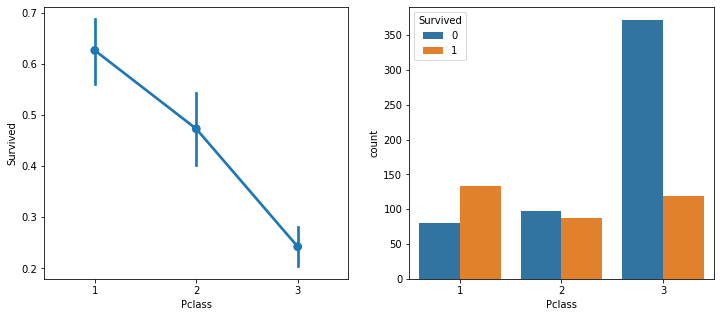

In [32]:
print(train.Pclass.unique())

#Data Visualization
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
sns.pointplot(data=train, x="Pclass", y="Survived", ax=ax1)
sns.countplot(data=train, x="Pclass", hue="Survived", ax=ax2)

Those of class 3 mostly didn't survive. The class 3 represents the lower class.

**Feature "Age"**

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


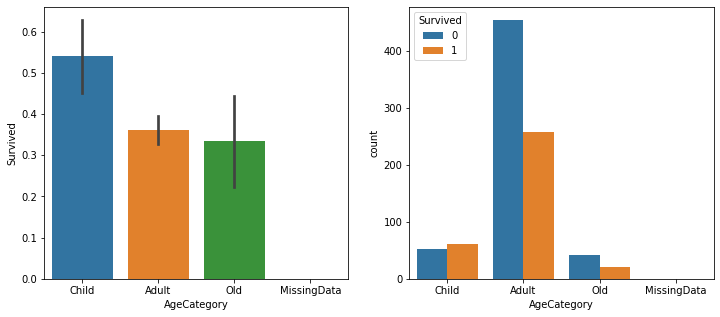

In [33]:
#Extracting the age categories from the column age
train["AgeCategory"] = "Adult"
train["AgeCategory"].loc[train["Age"] < 18 ] = "Child"
train["AgeCategory"].loc[train["Age"] > 50 ] = "Old"
train["AgeCategory"].loc[train["Age"].isnull()] = "Missing"

test["AgeCategory"] = "Adult"
test["AgeCategory"].loc[test["Age"] < 18 ] = "Child"
test["AgeCategory"].loc[test["Age"] > 50 ] = "Old"
test["AgeCategory"].loc[test["Age"].isnull()] = "Missing"


#Data Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
sns.barplot(data=train, x="AgeCategory", y="Survived", ax=ax1, order=["Child", "Adult", "Old", "MissingData"])
sns.countplot(data=train, x="AgeCategory", hue="Survived", ax=ax2, order=["Child", "Adult", "Old", "MissingData"])

#Creating the AgeCategory column as integer
train["AgeCategory"] = train["AgeCategory"].map({"Child" : 0, "Adult" : 1, "Old" : 2, "MissingData" : 3})
test["AgeCategory"] = test["AgeCategory"].map({"Child" : 0, "Adult" : 1, "Old" : 2, "MissingData" : 3})

#Dropping Age as it's not needed anymore
train.drop("Age", axis=1, inplace=True)
test.drop("Age", axis=1, inplace=True)


Most adults didn't make it. They were trying to save children at most.

**Feature "Family"**

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


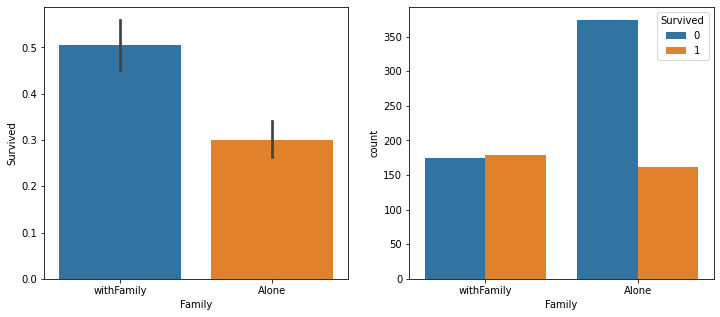

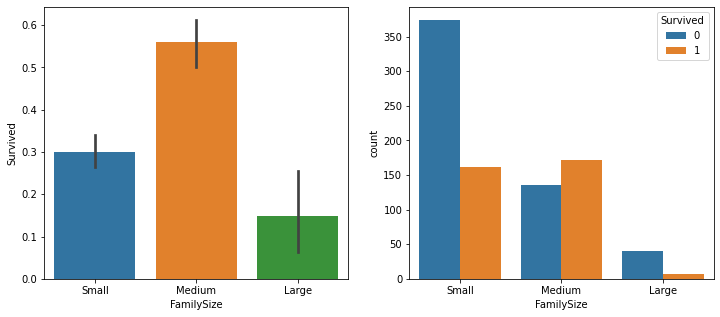

In [34]:
#Creating the column family from both the columns SibSp and Parch
#SipSp is Sibling/Spouse 
#Parch is Parent/Child
train['Family'] = train['SibSp'] + train['Parch'] + 1

#Getting the family size from Family
train['FamilySize'] = train['Family']
train['FamilySize'].loc[train['Family'] == 1] = "Small"
train['FamilySize'].loc[train['Family'] > 1] = "Medium"
train['FamilySize'].loc[train['Family'] > 5] = "Large"

#We want to know whether the person is travelling alone or with family
train['Family'].loc[train['Family'] > 1] = 'withFamily'
train['Family'].loc[train['Family'] == 1] = 'Alone'


test['Family'] = test['SibSp'] + test['Parch'] + 1
test['FamilySize'] = test['Family']
test['FamilySize'].loc[test['Family'] == 1] = "Small"
test['FamilySize'].loc[test['Family'] > 1] = "Medium"
test['FamilySize'].loc[test['Family'] > 5] = "Large"
test['Family'].loc[test['Family'] > 1] = 'withFamily'
test['Family'].loc[test['Family'] == 1] = 'Alone'

#Data Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
sns.barplot(data=train, x="Family", y="Survived", ax=ax1)
sns.countplot(data=train, x="Family", hue="Survived", ax=ax2)
fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(12,5))
sns.barplot(data=train, x="FamilySize", y="Survived", ax=ax3, order=["Small", "Medium", "Large"])
sns.countplot(data=train, x="FamilySize", hue="Survived", ax=ax4, order=["Small", "Medium", "Large"])

#Creating the family and family size columns as integers
train["Family"] = train["Family"].map({"Alone" : 0, "withFamily" : 1})
train["FamilySize"] = train["FamilySize"].map({"Small" : 0, "Medium" : 1, "Large" : 2})
test["Family"] = test["Family"].map({"Alone" : 0, "withFamily" : 1})
test["FamilySize"] = test["FamilySize"].map({"Small" : 0, "Medium" : 1, "Large" : 2})

#Drop SibSp and Parch columns as they're not needed anymore
train.drop(["Parch", "SibSp"], axis=1, inplace=True)
test.drop(["Parch", "SibSp"], axis=1, inplace=True)

We can see that people travelling alone or with small families tend less to survive.

**Feature "Fare"**

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


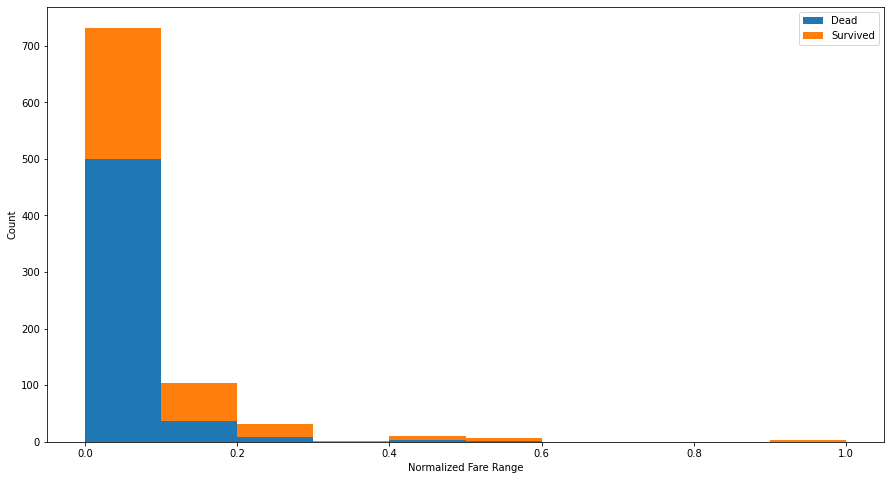

In [35]:
#Fare data contains some extreme values which can be normalized
#Creating a new column normalizedFare
scale = preprocessing.MinMaxScaler()
train['normalizedFare'] = scale.fit_transform(train['Fare'].array.reshape(-1,1))
test["normalizedFare"] = scale.transform(test['Fare'].array.reshape(-1,1))

#Data Visualization
fig = plt.figure(figsize=(15,8))
plt.hist([train[train["Survived"]==0]["normalizedFare"], train[train["Survived"]==1]["normalizedFare"]], stacked=True, bins=10, label=['Dead', 'Survived'])
plt.xlabel("Normalized Fare Range")
plt.ylabel("Count")
plt.legend()

#Dropping the fare column as it's not needed anymore
train.drop("Fare", axis=1, inplace=True)
test.drop("Fare", axis=1, inplace=True)

**Feature "Embarked"**

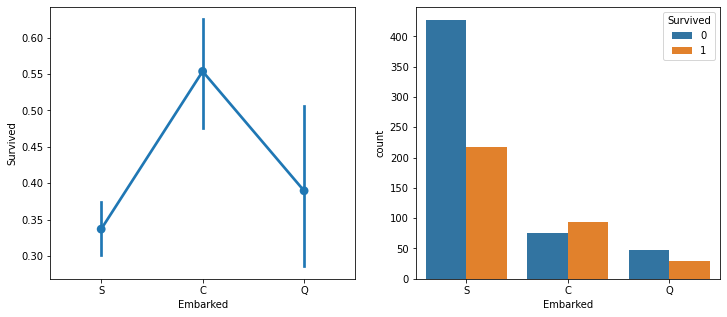

In [36]:
#Data Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
sns.pointplot(data=train, x="Embarked", y="Survived", ax=ax1)
sns.countplot(data=train, x="Embarked", hue="Survived", ax=ax2)

#Change the embarked column into integers
train["Embarked"] = train["Embarked"].map({"S" : 0, "C" : 1, "Q" : 2})
test["Embarked"] = test["Embarked"].map({"S" : 0, "C" : 1, "Q" : 2})

Those who embarked from Southampton mostly didn't make it.

## **Model's Implementation**

### **Dividing the data into X_train and Y_train**



In [218]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
accuracy_dict={}

print(X_train.shape)
print(Y_train.shape)

(889, 8)
(889,)


### ***Logistic Regression***

**Creating and training the model**

In [219]:
#Definition of the logistic regression model
lr=LogisticRegression()
model=lr.fit(X_train,Y_train)

In [220]:
#Creating predictions
Y_train_predicted=model.predict(X_train)

**Model's Evaluation**

In [221]:
#Score
score=model.score(X_train,Y_train)
print("The model's score is :",score)

The model's score is : 0.8098987626546682


In [224]:
#Comparing Y_train and Y_train_predicted
mean=np.mean(Y_train_predicted == Y_train)
print("The comparison betweeen Y_train and Y_train_predicted is :",mean)

The comparison betweeen Y_train and Y_train_predicted is : 0.8098987626546682


In [223]:
#Accuracy
scores = cross_val_score(model, X_train, Y_train, cv=10)
model_accuracy = scores.mean()
print("Logistic Regression model's accuracy :", model_accuracy)
accuracy_dict["Logistic Regression"] = model_accuracy
print(accuracy_dict)

Logistic Regression model's accuracy : 0.8076608784473953
{'Logistic Regression': 0.8076608784473953}


In [225]:
#F1 Score
f1score=f1_score(Y_train, Y_train_predicted, average='weighted')
print("The model's f1 score is :",f1score)

The model's f1 score is : 0.8086536272755862


In [226]:
#Precision Score
precisionscore=precision_score(Y_train, Y_train_predicted, average="weighted")
print("The model's precision score is :",precisionscore)

The model's precision score is : 0.8083560479704928


In [227]:
#Recall Score
recallscore=recall_score(Y_train, Y_train_predicted, average="weighted")
print("The model's recall score is :",recallscore)

The model's recall score is : 0.8098987626546682


In [228]:
#Confusion Matrix
cm=confusion_matrix(Y_train,Y_train_predicted)
print("The model's confusion matrix is :")
print(cm)

The model's confusion matrix is :
[[475  74]
 [ 95 245]]


### **KNN**

**Creating and training the model**

In [229]:
#Definition of the KNN model
#Cross-Validation
accuracy = []
k_value = []
for k in range(3,int(np.sqrt(len(train)))):
    kNN = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(kNN, X_train, Y_train, cv=5)
    accuracy.append(scores.mean())
    k_value.append(k)

#Maximum Accuracy
print("Maximum Accuracy :", max(accuracy))
print("Value of K corresponding to maximum accuracy :", k_value[accuracy.index(max(accuracy))])

#Final value of K must correspond to maximum accuracy.
KNN = KNeighborsClassifier(n_neighbors=k_value[accuracy.index(max(accuracy))])
model=KNN.fit(X_train, Y_train)

Maximum Accuracy : 0.8144163016568274
Value of K corresponding to maximum accuracy : 10


In [230]:
#Creating predictions
Y_train_predicted=model.predict(X_train)

**Model's Evaluation**

In [213]:
#Score
score=model.score(X_train,Y_train)
print("The model's score is :",score)

The model's score is : 0.8447694038245219


In [231]:
#Comparing Y_train and Y_train_predicted
mean=np.mean(Y_train_predicted == Y_train)
print("The comparison betweeen Y_train and Y_train_predicted is :",mean)

The comparison betweeen Y_train and Y_train_predicted is : 0.8447694038245219


In [232]:
#Accuracy
scores = cross_val_score(model, X_train, Y_train, cv=10)
model_accuracy = scores.mean()
print("KNN model's Accuracy :", model_accuracy)
accuracy_dict["KNN"] = model_accuracy
print(accuracy_dict)

KNN model's Accuracy : 0.8121552604698671
{'Logistic Regression': 0.8076608784473953, 'KNN': 0.8121552604698671}


In [233]:
#F1 Score
f1score=f1_score(Y_train, Y_train_predicted, average='weighted')
print("The model's f1 score is :",f1score)

The model's f1 score is : 0.8412797639806975


In [234]:
#Precision Score
precisionscore=precision_score(Y_train, Y_train_predicted, average="weighted")
print("The model's precision score is :",precisionscore)

The model's precision score is : 0.8463403281486366


In [236]:
#Recall Score
recallscore=recall_score(Y_train, Y_train_predicted, average="weighted")
print("The model's recall score is:",recallscore)

The model's recall score is: 0.8447694038245219


In [237]:
#Confusion Matrix
cm=confusion_matrix(Y_train,Y_train_predicted)
print("The model's confusion matrix is :")
print(cm)

The model's confusion matrix is :
[[510  39]
 [ 99 241]]


### **SVM**

**Creating and training the model**

In [238]:
#Definition of the SVM model
SVM = svm.SVC(kernel="linear")
model=SVM.fit(X_train,Y_train)

In [239]:
#Creating predictions
Y_train_predicted=model.predict(X_train)

**Model's Evaluation**

In [135]:
#Score
score=model.score(X_train,Y_train)
print("The model's score is :", score)

The model's score is : 0.796400449943757


In [136]:
#Comparing Y_train and Y_train_predicted
mean=np.mean(Y_train_predicted == Y_train)
print("The comparison betweeen Y_train and Y_train_predicted is :",mean)

The comparison betweeen Y_train and Y_train_predicted is : 0.796400449943757


In [240]:
#Accuracy
scores = cross_val_score(model, X_train, Y_train, cv=10)
model_accuracy = scores.mean()
print("SVM model's Accuracy :", model_accuracy)
accuracy_dict["SVM"] = model_accuracy
print(accuracy_dict)

SVM model's Accuracy : 0.7963993871297241
{'Logistic Regression': 0.8076608784473953, 'KNN': 0.8121552604698671, 'SVM': 0.7963993871297241}


In [138]:
#F1 Score
f1score=f1_score(Y_train, Y_train_predicted, average='weighted')
print("The model's f1 score is :",f1score)

The model's f1 score is : 0.7928441382095547


In [139]:
#Precision Score
precisionscore=precision_score(Y_train, Y_train_predicted, average="weighted")
print("The model's precision score is :",precisionscore)

The model's precision score is : 0.7944990718348947


In [140]:
#Recall Score
recallscore=recall_score(Y_train, Y_train_predicted, average="weighted")
print("The model's recall score is :",recallscore)

The model's recall score is : 0.796400449943757


In [143]:
#Confusion Matrix
cm=confusion_matrix(Y_train,Y_train_predicted)
print("The model's confusion matrix is :  ")
print(cm)

The model's confusion matrix is :  
[[483  66]
 [115 225]]


### **Decision Tree**

**Creating and training the model**

In [244]:
#Definition of the Decision Tree model
decisionTree = DecisionTreeClassifier()
model=decisionTree.fit(X_train,Y_train)

In [245]:
#Creating predictions
Y_train_predicted=model.predict(X_train)

**Model's Evaluation**

In [147]:
#Score
score=model.score(X_train,Y_train)
print("The model's score is :", score)

The model's score is : 0.9347581552305961


In [148]:
#Comparing Y_train and Y_train_predicted
mean=np.mean(Y_train_predicted == Y_train)
print("The comparison betweeen Y_train and Y_train_predicted is :",mean)

The comparison betweeen Y_train and Y_train_predicted is : 0.9347581552305961


In [243]:
#Accuracy
scores = cross_val_score(model, X_train, Y_train, cv=10)
model_accuracy = scores.mean()
print("Decision Tree model's Accuracy :", model_accuracy)
accuracy_dict["Decision Tree"] = model_accuracy
print(accuracy_dict)

Decision Tree model's Accuracy : 0.8121552604698671
{'Logistic Regression': 0.8076608784473953, 'KNN': 0.8121552604698671, 'SVM': 0.7963993871297241, 'Decision Tree': 0.8121552604698671}


In [150]:
#F1 Score
f1score=f1_score(Y_train, Y_train_predicted, average='weighted')
print("The model's f1 score is :",f1score)

The model's f1 score is : 0.9340710238162215


In [151]:
#Precision Score
precisionscore=precision_score(Y_train, Y_train_predicted, average="weighted")
print("The model's precision score is :",precisionscore)

The model's precision score is : 0.9360268121703063


In [152]:
#Recall Score
recallscore=recall_score(Y_train, Y_train_predicted, average="weighted")
print("The model's recall score is :",recallscore)

The model's recall score is : 0.9347581552305961


In [153]:
#Confusion Matrix
cm=confusion_matrix(Y_train,Y_train_predicted)
print("The model's confusion matrix is :  ")
print(cm)

The model's confusion matrix is :  
[[536  13]
 [ 45 295]]


### ***Random Forest***

**Creating and training the model**

In [246]:
#Definition of the Random Forest model
randomforest=RandomForestClassifier(n_estimators=100)
model=randomforest.fit(X_train, Y_train)

In [247]:
#Creating predictions
Y_train_predicted=model.predict(X_train)

**Model's Evaluation**

In [248]:
#Score
score=model.score(X_train,Y_train)
print("The model's score is :",score)

The model's score is : 0.9347581552305961


In [249]:
#Comparing Y_train and Y_train_predicted
mean=np.mean(Y_train_predicted == Y_train)
print("The comparison betweeen Y_train and Y_train_predicted is :",mean)

The comparison betweeen Y_train and Y_train_predicted is : 0.9347581552305961


In [250]:
#Accuracy
scores = cross_val_score(model, X_train, Y_train, cv=10)
model_accuracy = scores.mean()
print("Random Forest model's Accuracy :", model_accuracy)
accuracy_dict["RandomForest"] = model_accuracy
print(accuracy_dict)

Random Forest model's Accuracy : 0.8166624106230849
{'Logistic Regression': 0.8076608784473953, 'KNN': 0.8121552604698671, 'SVM': 0.7963993871297241, 'Decision Tree': 0.8121552604698671, 'RandomForest': 0.8166624106230849}


In [251]:
#F1 Score
f1score=f1_score(Y_train, Y_train_predicted, average='weighted')
print("The model's f1 score is :",f1score)

The model's f1 score is : 0.9343082542113846


In [252]:
#Precision Score
precisionscore=precision_score(Y_train, Y_train_predicted, average="weighted")
print("The model's precision score is :",precisionscore)

The model's precision score is : 0.9350909705827135


In [253]:
#Recall Score
recallscore=recall_score(Y_train, Y_train_predicted, average="weighted")
print("The model's recall score is :",recallscore)

The model's recall score is : 0.9347581552305961


In [254]:
#Confusion Matrix
cm=confusion_matrix(Y_train,Y_train_predicted)
print("The model's confusion matrix is :")
print(cm)

The model's confusion matrix is :
[[531  18]
 [ 40 300]]


### **Neural Networks**

**Creating and training the model**

In [167]:
#Reshaping Y_train
Y_train=to_categorical(Y_train)
Y_train.shape
Y_train=Y_train.reshape(889,-1)
Y_train.shape

(889, 8)

In [170]:
#Model's Architecture
model=Sequential()
model.add(Dense(512,input_shape=(8,)))
model.add(Activation('relu'))
model.add(Dense(8))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 512)               4608      
                                                                 
 activation_8 (Activation)   (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 8)                 4104      
                                                                 
 activation_9 (Activation)   (None, 8)                 0         
                                                                 
Total params: 8,712
Trainable params: 8,712
Non-trainable params: 0
_________________________________________________________________


In [171]:
#Compiling and fitting the model
#After a test accuracy comparison between the optimizers rmsprop,adam and sgd , rmsprop has the highest test accuracy
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
fit=model.fit(X_train,Y_train,epochs=10,batch_size=128)

Epoch 1/10
7/7 [==============================] - 1s 5ms/step - loss: 8.2159 - accuracy: 0.0090
Epoch 2/10
7/7 [==============================] - 0s 5ms/step - loss: 8.0982 - accuracy: 0.0045
Epoch 3/10
7/7 [==============================] - 0s 3ms/step - loss: 8.0536 - accuracy: 0.0000e+00
Epoch 4/10
7/7 [==============================] - 0s 4ms/step - loss: 8.0461 - accuracy: 0.0000e+00
Epoch 5/10
7/7 [==============================] - 0s 3ms/step - loss: 8.0418 - accuracy: 0.0000e+00
Epoch 6/10
7/7 [==============================] - 0s 3ms/step - loss: 8.0682 - accuracy: 0.0000e+00
Epoch 7/10
7/7 [==============================] - 0s 3ms/step - loss: 8.0982 - accuracy: 0.0000e+00
Epoch 8/10
7/7 [==============================] - 0s 3ms/step - loss: 8.1165 - accuracy: 0.0000e+00
Epoch 9/10
7/7 [==============================] - 0s 3ms/step - loss: 8.1534 - accuracy: 0.0000e+00
Epoch 10/10
7/7 [==============================] - 0s 3ms/step - loss: 8.1681 - accuracy: 0.0000e+00


In [183]:
Y_train_predicted=model.predict(X_train)

28/28 [==============================] - 0s 1ms/step


**Model's Evaluation**

In [255]:
#Comparing Y_train and Y_train_predicted
mean=np.mean(Y_train_predicted == Y_train)
print("The comparison betweeen Y_train and Y_train_predicted is :",mean)

The comparison betweeen Y_train and Y_train_predicted is : 0.9347581552305961


### **Comparing the models**

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Maching Learning Methods')]

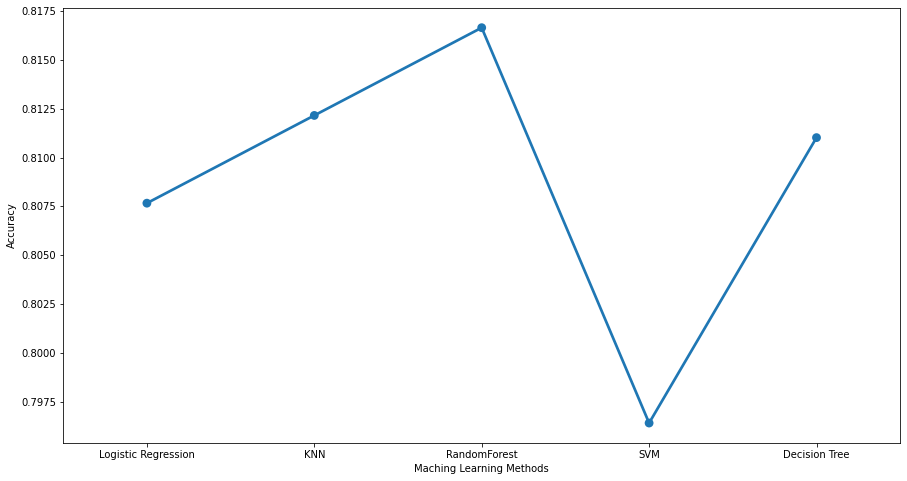

In [199]:
fig = plt.figure(figsize=(15,8))
fig = sns.pointplot(y=list(accuracy_dict.values()), x=list(accuracy_dict.keys()))
fig.set(ylabel="Accuracy", xlabel="Maching Learning Methods")

The accuracy scores provided by the different models are close. But we can see here that the model Random Forest has the best accuracy score and the model SVM has the worst one.